## Low-income areas in Madrid, chosen spots for gambling houses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
from IPython.display import display, HTML
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
df = pd.read_csv('variables.csv')
df.head()

,district,district_id,total_casinos,high_school_students,pre_college_students,total_population,migrant_popu,percent_migrant,umemployed_popu,median_income_capita,median_household_income
0,Centro,1,31,4032,3548,140183,37380,26.67,8138,16711,33473
1,Arganzuela,2,24,3461,1125,153027,16375,10.70,6732,17738,42088
2,Retiro,3,8,4107,2627,117972,10431,8.84,4122,21598,53111
3,Salamanca,4,16,4979,2666,145941,22803,15.62,4919,24683,57720
4,Chamartin,5,12,7925,5486,144670,14914,10.31,4861,26267,65995


### We add the official number of betting shops according to 2017 data

In [3]:
df['casinos_17'] = [27,19,7,15,12,24,20,3,5,18,26,17,22,4,22,6,14,4,6,11,1]
df.head()

,district,district_id,total_casinos,high_school_students,pre_college_students,total_population,migrant_popu,percent_migrant,umemployed_popu,median_income_capita,median_household_income,casinos_17
0,Centro,1,31,4032,3548,140183,37380,26.67,8138,16711,33473,27
1,Arganzuela,2,24,3461,1125,153027,16375,10.70,6732,17738,42088,19
2,Retiro,3,8,4107,2627,117972,10431,8.84,4122,21598,53111,7
3,Salamanca,4,16,4979,2666,145941,22803,15.62,4919,24683,57720,15
4,Chamartin,5,12,7925,5486,144670,14914,10.31,4861,26267,65995,12


### We create other columns that can be useful for our analysis

In [4]:
df['casino_increase_%'] = ((df.total_casinos - df.casinos_17) / df.total_casinos * 100).round(2)
df['abs_increase'] = (df.total_casinos - df.casinos_17)
df['casinos_per_10K'] = (df.total_casinos / df.total_population * 10000).round(2)
df['young_percent'] = (df.pre_college_students / df.total_population * 100).round(2)
df['unemployed_percent'] = ((df.umemployed_popu / df.total_population) * 100).round(2)

In [5]:
df['pct_household_7plus'] = [1.35, 1.15,1.28,1.38,2.02,2.61,1.30,1.86,2.09,2.32,3.26,4.13,3.22,1.53,2.19,1.55,3.57,1.81,1.85,1.91,1.25]
df.sort_values(by='total_casinos', ascending=False)

,district,district_id,total_casinos,high_school_students,pre_college_students,total_population,migrant_popu,percent_migrant,umemployed_popu,median_income_capita,median_household_income,casinos_17,casino_increase_%,abs_increase,casinos_per_10K,young_percent,unemployed_percent,pct_household_7plus
10,Carabanchel,11,48,8011,2885,256283,55233,21.55,16761,10988,28721,26,45.83,22,1.87,1.13,6.54,3.26
12,Puente de vallecas,13,43,8823,2975,236336,47934,20.28,18337,9706,25527,22,48.84,21,1.82,1.26,7.76,3.22
5,Tetuan,6,39,2752,1272,157856,32025,20.29,8515,15180,36142,24,38.46,15,2.47,0.81,5.39,2.61
11,Usera,12,32,5196,1503,141220,33868,23.98,10047,9552,26501,17,46.88,15,2.27,1.06,7.11,4.13
0,Centro,1,31,4032,3548,140183,37380,26.67,8138,16711,33473,27,12.90,4,2.21,2.53,5.81,1.35
9,Latina,10,28,8560,2682,237780,41698,17.54,13932,12370,30847,18,35.71,10,1.18,1.13,5.86,2.32
14,Ciudad lineal,15,28,8064,3096,214613,33562,15.64,10771,15111,37621,22,21.43,6,1.30,1.44,5.02,2.19
1,Arganzuela,2,24,3461,1125,153027,16375,10.70,6732,17738,42088,19,20.83,5,1.57,0.74,4.40,1.15
16,Villaverde,17,23,6186,1302,154305,33435,21.67,11466,9875,27392,14,39.13,9,1.49,0.84,7.43,3.57
6,Chamberi,7,21,4459,2300,137729,17614,12.79,4763,22897,51644,20,4.76,1,1.52,1.67,3.46,1.30


In [6]:
df.sort_values(by='casinos_per_10K', ascending=False)

,district,district_id,total_casinos,high_school_students,pre_college_students,total_population,migrant_popu,percent_migrant,umemployed_popu,median_income_capita,median_household_income,casinos_17,casino_increase_%,abs_increase,casinos_per_10K,young_percent,unemployed_percent,pct_household_7plus
5,Tetuan,6,39,2752,1272,157856,32025,20.29,8515,15180,36142,24,38.46,15,2.47,0.81,5.39,2.61
11,Usera,12,32,5196,1503,141220,33868,23.98,10047,9552,26501,17,46.88,15,2.27,1.06,7.11,4.13
0,Centro,1,31,4032,3548,140183,37380,26.67,8138,16711,33473,27,12.90,4,2.21,2.53,5.81,1.35
10,Carabanchel,11,48,8011,2885,256283,55233,21.55,16761,10988,28721,26,45.83,22,1.87,1.13,6.54,3.26
12,Puente de vallecas,13,43,8823,2975,236336,47934,20.28,18337,9706,25527,22,48.84,21,1.82,1.26,7.76,3.22
1,Arganzuela,2,24,3461,1125,153027,16375,10.70,6732,17738,42088,19,20.83,5,1.57,0.74,4.40,1.15
6,Chamberi,7,21,4459,2300,137729,17614,12.79,4763,22897,51644,20,4.76,1,1.52,1.67,3.46,1.30
16,Villaverde,17,23,6186,1302,154305,33435,21.67,11466,9875,27392,14,39.13,9,1.49,0.84,7.43,3.57
14,Ciudad lineal,15,28,8064,3096,214613,33562,15.64,10771,15111,37621,22,21.43,6,1.30,1.44,5.02,2.19
9,Latina,10,28,8560,2682,237780,41698,17.54,13932,12370,30847,18,35.71,10,1.18,1.13,5.86,2.32


In [7]:
df.describe().round(1)

,district_id,total_casinos,high_school_students,pre_college_students,total_population,migrant_popu,percent_migrant,umemployed_popu,median_income_capita,median_household_income,casinos_17,casino_increase_%,abs_increase,casinos_per_10K,young_percent,unemployed_percent,pct_household_7plus
count,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
mean,11.0,19.7,5641.8,2322.8,156954.0,24770.3,15.3,8273.4,16300.2,40896.3,13.5,29.5,6.2,1.2,1.5,5.2,2.1
std,6.2,13.5,2383.4,1221.7,56027.4,13496.9,5.3,4241.2,5119.4,12036.7,8.3,19.6,6.7,0.6,0.7,1.4,0.8
min,1.0,3.0,2001.0,576.0,50216.0,5069.0,8.8,1969.0,9552.0,25527.0,1.0,0.0,0.0,0.4,0.6,3.4,1.2
25%,6.0,8.0,3671.0,1302.0,120746.0,14914.0,10.7,4861.0,12114.0,31447.0,6.0,14.3,1.0,0.6,1.1,3.8,1.4
50%,11.0,16.0,5196.0,2599.0,145941.0,22234.0,14.3,8138.0,15180.0,36142.0,14.0,21.4,3.0,1.1,1.3,5.4,1.9
75%,16.0,28.0,8011.0,2975.0,193797.0,33562.0,20.3,10047.0,18661.0,50379.0,20.0,42.9,9.0,1.6,1.7,6.0,2.3
max,21.0,48.0,10190.0,5486.0,256283.0,55233.0,26.7,18337.0,26267.0,65995.0,27.0,70.0,22.0,2.5,3.8,7.8,4.1


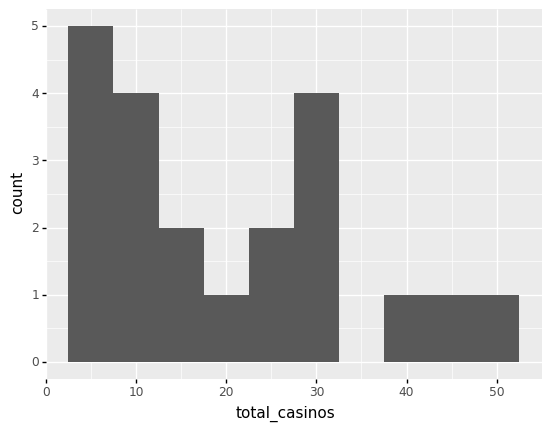

<ggplot: (318675788)>

In [31]:
(
    ggplot(df, aes(x='total_casinos')) + 
        geom_histogram(bins=10)
)


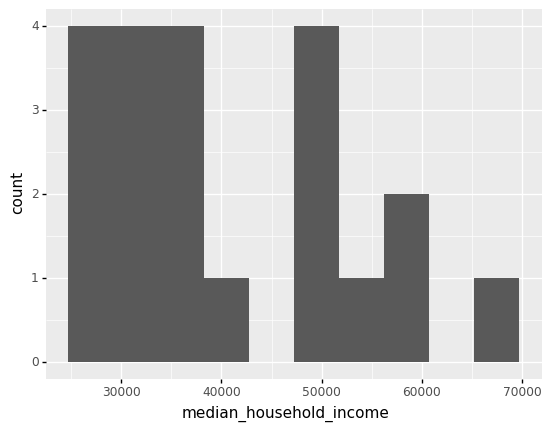

<ggplot: (318207940)>

In [11]:
(
    ggplot(df, aes(x='median_household_income')) + 
        geom_histogram(bins=10)
)

### We want to compare the situation in those districts where the median household income is below the national median. We see that in at least three of those districts -Carabanchel, Usera and Puente de Vallecas- the number of gambling houses has almost doubled in the last 5 years

In [12]:
df_low = df[df.median_household_income < 35485]
df_low.head()

,district,district_id,total_casinos,high_school_students,pre_college_students,total_population,migrant_popu,percent_migrant,umemployed_popu,median_income_capita,median_household_income,casinos_17,casino_increase_%,abs_increase,casinos_per_10K,young_percent,unemployed_percent,pct_household_7plus
0,Centro,1,31,4032,3548,140183,37380,26.67,8138,16711,33473,27,12.90,4,2.21,2.53,5.81,1.35
9,Latina,10,28,8560,2682,237780,41698,17.54,13932,12370,30847,18,35.71,10,1.18,1.13,5.86,2.32
10,Carabanchel,11,48,8011,2885,256283,55233,21.55,16761,10988,28721,26,45.83,22,1.87,1.13,6.54,3.26
11,Usera,12,32,5196,1503,141220,33868,23.98,10047,9552,26501,17,46.88,15,2.27,1.06,7.11,4.13
12,Puente de vallecas,13,43,8823,2975,236336,47934,20.28,18337,9706,25527,22,48.84,21,1.82,1.26,7.76,3.22


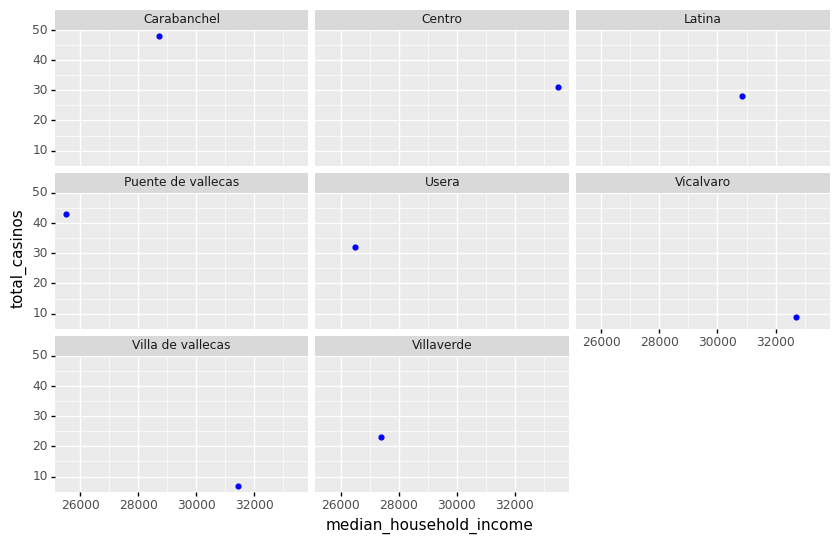

<ggplot: (318248360)>

In [13]:
(
    ggplot() + 
        geom_point(df_low, aes(y='total_casinos', x='median_household_income'),color='blue') +
        facet_wrap('district') +
        theme(figure_size=(10, 6))
)


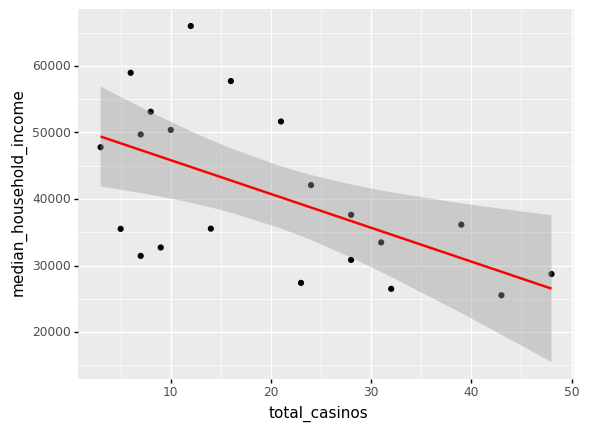

<ggplot: (318218132)>

In [14]:
(
    ggplot(df, aes(x='total_casinos', y='median_household_income')) + 
        geom_point() + 
        geom_smooth(method='lm', color='red')
)

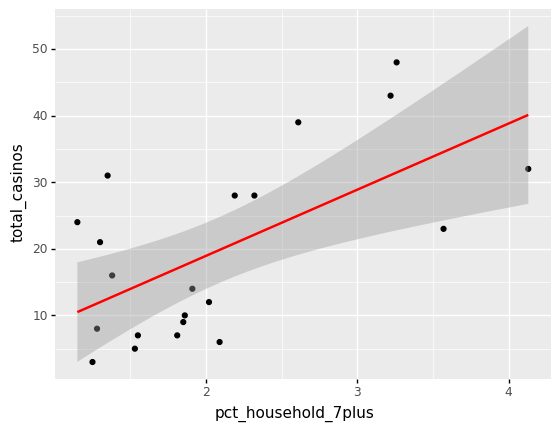

<ggplot: (318480835)>

In [15]:
# number of casinos and percentage of households with seven or more cohabitants
(
    ggplot(df, aes(y='total_casinos', x='pct_household_7plus')) + 
        geom_point() + 
        geom_smooth(method='lm', color='red')
)

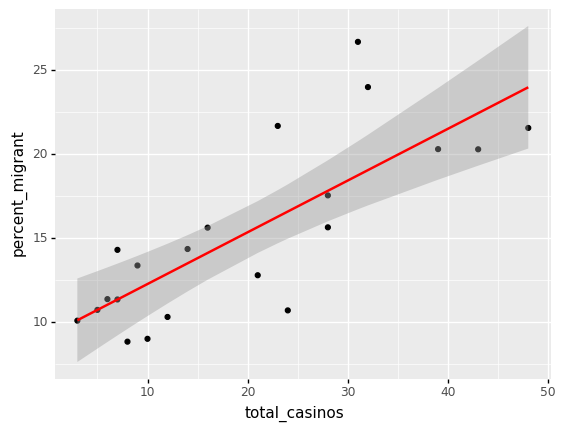

<ggplot: (318207874)>

In [16]:
(
    ggplot(df, aes(x='total_casinos', y='percent_migrant')) + 
        geom_point() + 
        geom_smooth(method='lm', color='red')
)


In [18]:
import statsmodels.formula.api as smf

model = smf.ols("total_casinos ~  percent_migrant", data=df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_casinos   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     30.42
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           2.55e-05
Time:                        00:15:24   Log-Likelihood:                -73.832
No. Observations:                  21   AIC:                             151.7
Df Residuals:                      19   BIC:                             153.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.7943      5.838     -1.849      0.080     -23.013       1.425
percent_migrant     1.9993      0.362      5.516      0.000       1.241       2.758
==============================================================================
Omnibus:                        2.429   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.598
Skew:                           0.451   Prob(JB):                        0.450
Kurtosis:                       1.993   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# it is still significant using 2017 data
import statsmodels.formula.api as smf

model = smf.ols("casinos_17 ~ percent_migrant", data=df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             casinos_17   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     22.28
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           0.000149
Time:                        00:15:24   Log-Likelihood:                -65.621
No. Observations:                  21   AIC:                             135.2
Df Residuals:                      19   BIC:                             137.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.1822      3.948     -1.059      0.303     -12.446       4.082
percent_migrant     1.1572      0.245      4.720      0.000       0.644       1.670
==============================================================================
Omnibus:                        1.622   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.162
Skew:                           0.327   Prob(JB):                        0.559
Kurtosis:                       2.052   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model = smf.ols("total_casinos ~  pct_household_7plus", data=df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_casinos   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     11.84
Date:                Mon, 04 Apr 2022   Prob (F-statistic):            0.00274
Time:                        00:15:24   Log-Likelihood:                -78.783
No. Observations:                  21   AIC:                             161.6
Df Residuals:                      19   BIC:                             163.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.9294      6.448     -0.144      0.887     -14.425      12.566
pct_household_7plus     9.9362      2.887      3.441      0.003       3.893      15.979
==============================================================================
Omnibus:                        6.221   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                2.260
Skew:                           0.436   Prob(JB):                        0.323
Kurtosis:                       1.650   Cond. No.                         7.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
## cleaned data

In [73]:
df_final = pd.read_csv('betting_coord.csv')
df_final.head()

,local_id,district_id,district,id_hood,neighborhood,seccion_census,kind_street,street name,num,letter,sign,full_address,url,url_betting_coor,lat,long
0,280073438,15,Ciudad lineal,1507,Colina,156,Calle,Lopez de hoyos,346,b,Betmadrid,Calle Lopez de hoyos 346,https://www.google.com/maps/search/Calle Lopez...,https://maps.google.com/maps/api/staticmap?cen...,40.457923,-3.660225
1,280064229,14,Moratalaz,1403,Marroquina,24,Calle,Marroquina,22,NaN,Codere,Calle Marroquina 22,https://www.google.com/maps/search/Calle Marro...,https://maps.google.com/maps/api/staticmap?cen...,40.407348,-3.649345
2,280064626,14,Moratalaz,1404,Media legua,40,Calle,Corregidor diego de valderrabano,25,NaN,Sal0n de juegos,Calle Corregidor diego de valderrabano 25,https://www.google.com/maps/search/Calle Corre...,https://maps.google.com/maps/api/staticmap?cen...,40.411859,-3.658358
3,280065038,19,Vicalvaro,1901,Casco h.vicalvaro,12,Calle,Villardondiego,39,NaN,Sportium,Calle Villardondiego 39,https://www.google.com/maps/search/Calle Villa...,https://maps.google.com/maps/api/staticmap?cen...,40.404636,-3.607971
4,280066597,20,San blas-canillejas,2007,Canillejas,101,Calle,Gutierrez canales,2,NaN,Salon juego,Calle Gutierrez canales 2,https://www.google.com/maps/search/Calle Gutie...,https://maps.google.com/maps/api/staticmap?cen...,40.446764,-3.612540


In [74]:
df_district = df_final.groupby('district').district.count().to_frame('counts').reset_index() 
df_district.sort_values(by='counts', ascending=False)

,district,counts
2,Carabanchel,47
12,Puente de vallecas,43
16,Tetuan,39
17,Usera,32
3,Centro,31
6,Ciudad lineal,28
9,Latina,27
0,Arganzuela,24
5,Chamberi,21
20,Villaverde,20


In [75]:
casinos_17 = {'Carabanchel': 26, 'Centro': 27, 'Tetuan': 24, 'Ciudad lineal': 22, 'Puente de vallecas': 22, 
              'Villa de vallecas': 4,'Chamberi': 20, 'Arganzuela': 19, 'Latina': 18, 'Usera': 17, 'Villaverde': 14, 
              'Salamanca': 15,'Chamartin': 12, 'San blas-canillejas': 11, 'Fuencarral-el pardo': 11, 'Retiro': 7, 
              'Vicalvaro': 6,'Hortaleza': 6, 'Moncloa-aravaca': 5, 'Moratalaz': 4, 'Fuencarral-el pardo': 3, 'Barajas': 1}



In [76]:
casinos_17

{'Carabanchel': 26,
 'Centro': 27,
 'Tetuan': 24,
 'Ciudad lineal': 22,
 'Puente de vallecas': 22,
 'Villa de vallecas': 4,
 'Chamberi': 20,
 'Arganzuela': 19,
 'Latina': 18,
 'Usera': 17,
 'Villaverde': 14,
 'Salamanca': 15,
 'Chamartin': 12,
 'San blas-canillejas': 11,
 'Fuencarral-el pardo': 3,
 'Retiro': 7,
 'Vicalvaro': 6,
 'Hortaleza': 6,
 'Moncloa-aravaca': 5,
 'Moratalaz': 4,
 'Barajas': 1}

In [70]:
df_district['houses_2017'] = df_district['district'].map(casinos_17)
df_district

,district,houses_2017,abs_increase,casino_increase_%
0,Arganzuela,19,5,26.32
1,Barajas,1,2,200.00
2,Carabanchel,26,21,80.77
3,Centro,27,4,14.81
4,Chamartin,12,0,0.00
5,Chamberi,20,1,5.00
6,Ciudad lineal,22,6,27.27
7,Fuencarral-el pardo,3,7,233.33
8,Hortaleza,6,1,16.67
9,Latina,18,9,50.00


In [77]:
df_order =df_district.sort_values('counts', ascending=False)

In [78]:
order = df_order.district.to_list()
order

['Carabanchel',
 'Puente de vallecas',
 'Tetuan',
 'Usera',
 'Centro',
 'Ciudad lineal',
 'Latina',
 'Arganzuela',
 'Chamberi',
 'Villaverde',
 'Salamanca',
 'San blas-canillejas',
 'Chamartin',
 'Fuencarral-el pardo',
 'Vicalvaro',
 'Hortaleza',
 'Retiro',
 'Villa de vallecas',
 'Moratalaz',
 'Moncloa-aravaca',
 'Barajas']

In [80]:
df_district1 =df_district.melt(
    id_vars='district',
    value_name='total',
    var_name='year')
df_district1

,district,year,total
0,Arganzuela,counts,24
1,Barajas,counts,3
2,Carabanchel,counts,47
3,Centro,counts,31
4,Chamartin,counts,12
5,Chamberi,counts,21
6,Ciudad lineal,counts,28
7,Fuencarral-el pardo,counts,10
8,Hortaleza,counts,7
9,Latina,counts,27


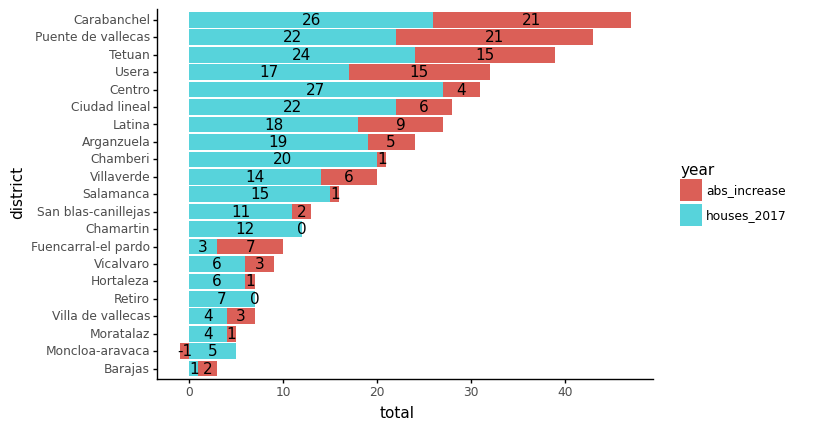

<ggplot: (284528562)>

In [60]:
chart_pct =(
    ggplot(df_district1)
    + aes(x='district', y='total', fill = 'year')
    + scale_x_discrete(limits=order[::-1])
    + geom_bar(stat='identity')
    + geom_text(aes(label='total'),position = position_stack(vjust=0.5))
    + coord_flip()
    + theme_classic()
)
chart_pct

In [61]:
chart_pct.save("5.svg")

/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 5.svg
